# Spectrum check for HESS J1640

This is a check for https://github.com/gammapy/gamma-cat/issues/117 .

The conclusion is that the statement concerning the flux norm in the paper is wrong, or at least misleading.

The statement in the paper is this:

    The fit of a power law with exponential cut-off: dN/dE = phi0 × (E/1 TeV)−  e−E/Ec results in a photon index   = 2.11 ± 0.09stat ± 0.10sys, a differential flux normalization at 1 TeV of  phi0 = (3.3 ± 0.1stat ± 0.6sys ) × 10−12 TeV−1 cm−2 s−1 and a cut-off energy of E = 6.0+2.0 TeV. 

The problem is that there's a difference between the amplitude parameter phi0, and the differential flux at 1 TeV, given by this factor:

    exp(E/Ec) = exp(1/6.0) = 1.18

The correct spectral model (as confirmed via [this page](https://hess-confluence.desy.de/confluence/display/HESS/Example+Analysis+Summary+Page#ExampleAnalysisSummaryPage-Spectrum)) actually has a differential flux at 1 TeV of 3.3e-12 cm-2 s-1 TeV-1, and an amplitude:

    phi0 = 1.18 * 3.3e-12 cm-2 s-1 TeV-1 = 3.9e-12 cm-2 s-1 TeV-1

The solution for us in gamma-cat and the HGPS cross-check is to change the data entry,
and to report this back to Stefan Ohm and HESS.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from gammapy.spectrum.models import ExponentialCutoffPowerLaw
from gammapy.catalog import SourceCatalogGammaCat

In [2]:
cat = SourceCatalogGammaCat()
source = cat['HESS J1640-465']
# print(source)
# print(source.spectral_model)

In [3]:
# To check, we plot an extra spectrum with parameters from here:
# https://hess-confluence.desy.de/confluence/display/HESS/Example+Analysis+Summary+Page#ExampleAnalysisSummaryPage-Spectrum
spectral_model = ExponentialCutoffPowerLaw(
    index=2.1055,
    amplitude=1.4194e-11 * u.Unit('cm-2 s-1 TeV-1'),
    lambda_=0.1670 * u.Unit('TeV-1'),
    reference=0.5435 * u.Unit('TeV'),
)
# print(spectral_model)

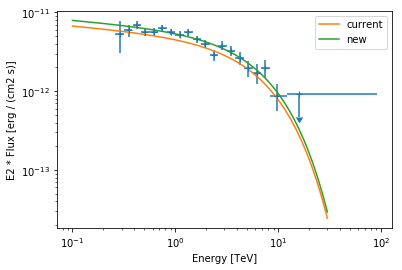

In [4]:
energy_range=[0.1, 30] * u.TeV
opts = dict(energy_power=2, flux_unit='cm-2 s-1 erg-1')
source.flux_points.plot(**opts)
source.spectral_model.plot(energy_range, label='current', **opts)
spectral_model.plot(energy_range, label='new', **opts)
plt.legend()

[]

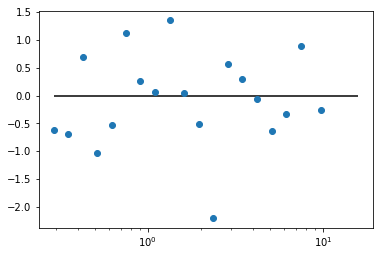

In [5]:
# Plot residual points wrt new spectral model defined here
x = source.flux_points.table['e_ref']
y_data = source.flux_points.table['dnde']
y_model = spectral_model(x)
y_err = source.flux_points.table['dnde_errp']
y = (y_data - y_model) / y_err
plt.plot(x, y, 'o')
plt.hlines([0], x[0], x[-1])
plt.semilogx()

In [6]:
# This new spectrum and residual points matches the published Figure 2 in the paper exactly.
# So what's wrong?
print('\n\n *** catalog *** \n\n')
print(source.spectral_model)
print(source.spectral_model(0.5435 * u.TeV))
print(source.spectral_model(1.0 * u.TeV))

print('\n\n *** new *** \n\n')
print(spectral_model)
print(spectral_model(0.5435 * u.TeV))
print(spectral_model(1.0 * u.TeV))



 *** catalog *** 


ExponentialCutoffPowerLaw

Parameters: 

	   name     value     error         unit      min  max  frozen
	--------- --------- --------- --------------- ---- ---- ------
	    index 2.110e+00 9.000e-02                    0 None  False
	amplitude 3.300e-12 1.000e-13 1 / (cm2 s TeV)    0 None  False
	reference 1.000e+00 0.000e+00             TeV None None   True
	  lambda_ 1.667e-01 5.556e-02         1 / TeV    0 None  False

Covariance: 

	name/name index  amplitude lambda_
	--------- ------ --------- -------
	    index 0.0081       0.0     0.0
	amplitude    0.0     1e-26     0.0
	  lambda_    0.0       0.0 0.00309
1.0911966576915133e-11 1 / (cm2 s TeV)
2.7933897176874854e-12 1 / (cm2 s TeV)


 *** new *** 


ExponentialCutoffPowerLaw

Parameters: 

	   name     value   error       unit      min  max  frozen
	--------- --------- ----- --------------- ---- ---- ------
	    index 2.106e+00   nan                    0 None  False
	amplitude 1.419e-11   nan 1 / (cm2 s TeV

In [7]:
# The problem is this factor, as explained at the top:
print(np.exp(1 / 6.0))
print(1.18 * 3.3e-12)
print(3.326904018546751e-12 * 1.18)

1.18136041287
3.894e-12
3.925746741885166e-12
